EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

STEP 1 - Generate summary statistics (mean, median, mode, standard deviation, min, max, etc.) of the dataset

In [2]:
#loading the cleaned Titanic dataset
analysis = pd.read_csv('cleaned_titanic_data.csv')

In [3]:
#Generating summary statistics
summary_stats = analysis.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  721.000000  721.000000  721.000000  721.000000  721.000000  721.000000
mean     0.337032    2.509015   -0.097389    0.414702    0.323162   -0.298283
std      0.473024    0.717046    0.770186    0.853916    0.788549    0.273087
min      0.000000    1.000000   -2.025883    0.000000    0.000000   -0.648422
25%      0.000000    2.000000   -0.565736    0.000000    0.000000   -0.489442
50%      0.000000    3.000000   -0.104637    0.000000    0.000000   -0.401268
75%      1.000000    3.000000    0.279612    1.000000    0.000000   -0.124920
max      1.000000    3.000000    1.893459    5.000000    6.000000    0.660333


In [4]:
# for median
median = analysis.median(numeric_only=True)
print("\nMedian Values:")
print(median)


Median Values:
Survived      0.000000
Pclass        3.000000
Age          -0.104637
SibSp         0.000000
Parch         0.000000
Fare         -0.401268
Sex_male      1.000000
Embarked_Q    0.000000
Embarked_S    1.000000
dtype: float64


In [5]:
#final summary statistics dataframe
summary = analysis.agg(['mean', 'std', 'min', 'max', 'median'])
print("\nFinal Summary Statistics:")
print(summary)


Final Summary Statistics:
        Survived    Pclass       Age     SibSp     Parch      Fare  Sex_male  \
mean    0.337032  2.509015 -0.097389  0.414702  0.323162 -0.298283  0.679612   
std     0.473024  0.717046  0.770186  0.853916  0.788549  0.273087   0.46695   
min     0.000000  1.000000 -2.025883  0.000000  0.000000 -0.648422     False   
max     1.000000  3.000000  1.893459  5.000000  6.000000  0.660333      True   
median  0.000000  3.000000 -0.104637  0.000000  0.000000 -0.401268       1.0   

       Embarked_Q Embarked_S  
mean     0.098474   0.755895  
std      0.298162   0.429854  
min         False      False  
max          True       True  
median        0.0        1.0  


STEP 2 - Creating histograms and box plots to visualize the distribution of the numerical variables in the dataset

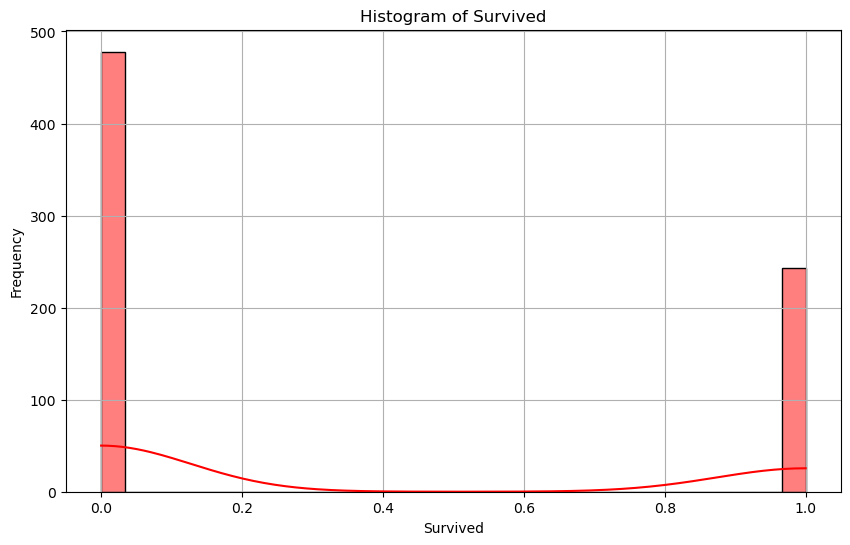

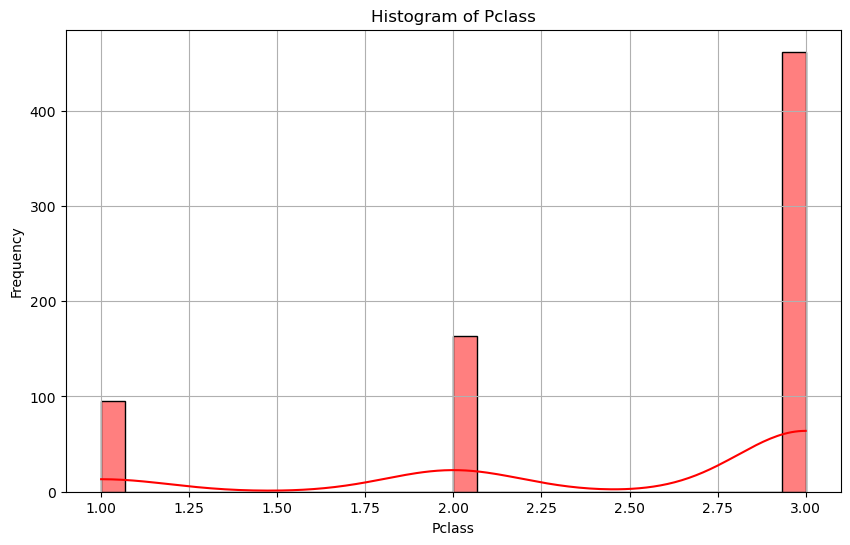

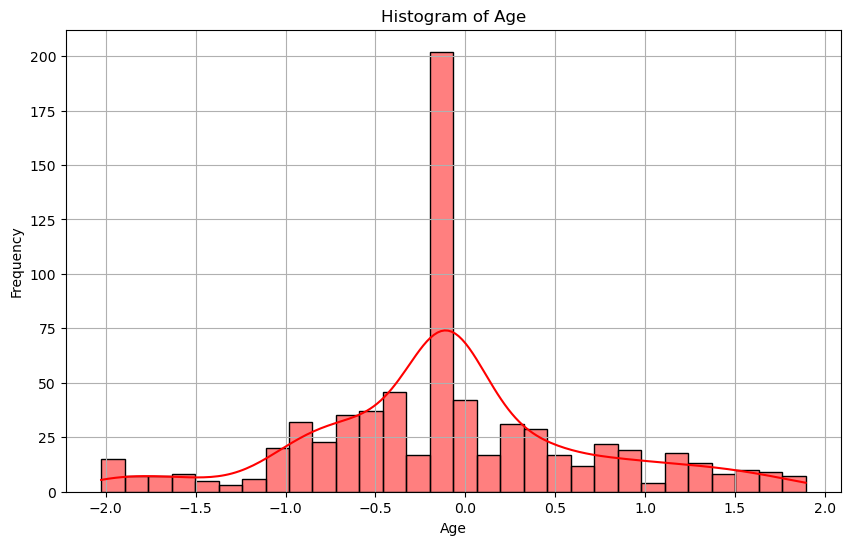

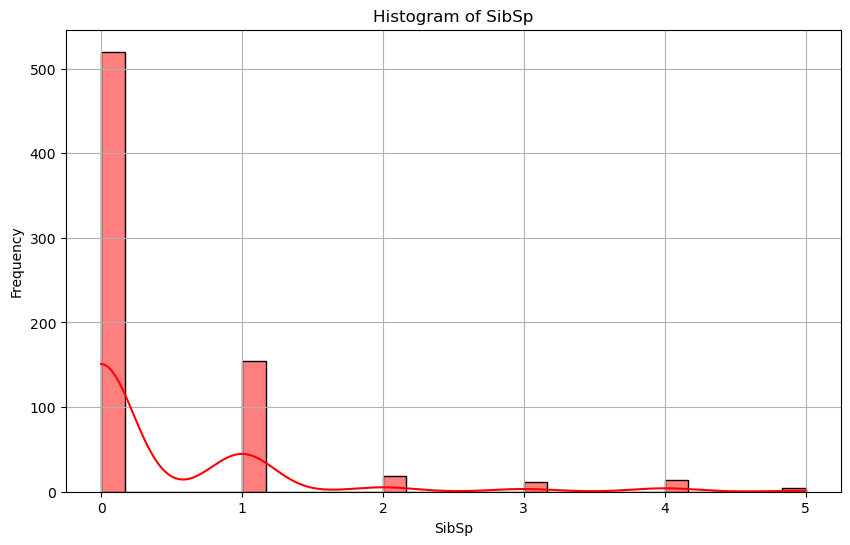

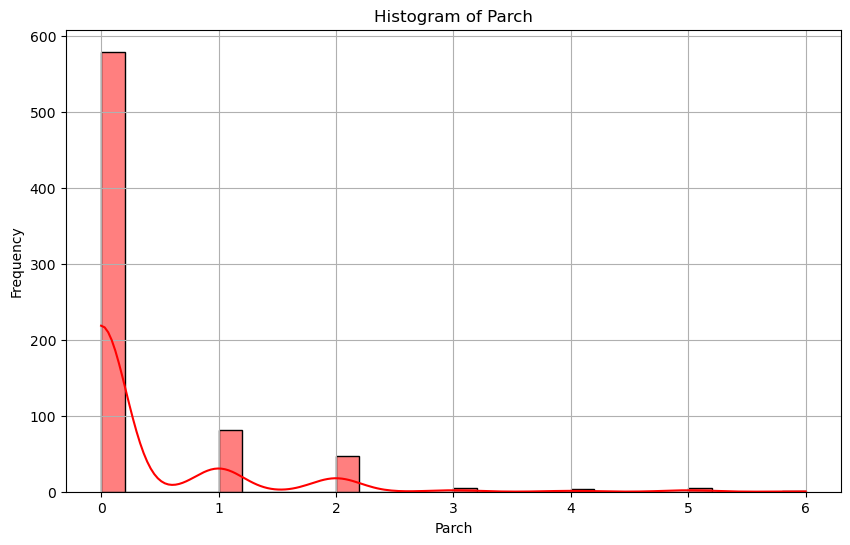

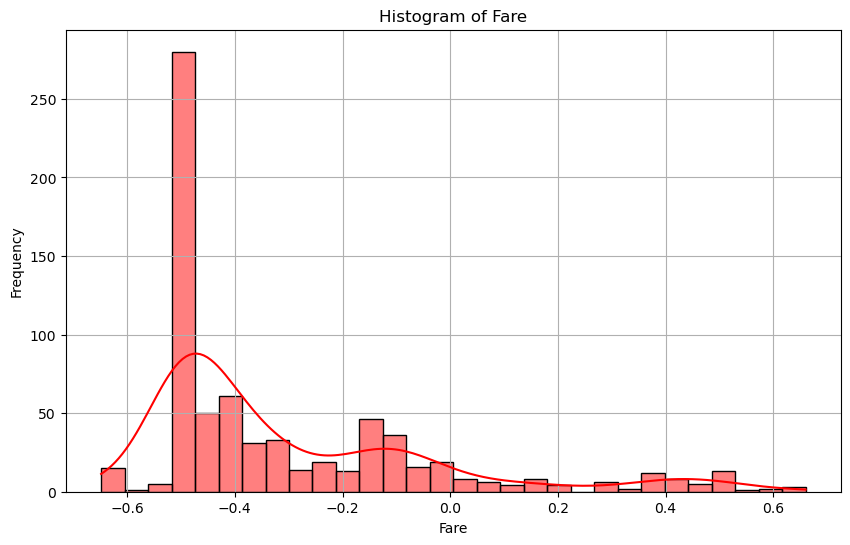

In [6]:

# Plotting histograms for numerical features
numerical_features = analysis.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(analysis[feature], kde=True, bins=30,color='red', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

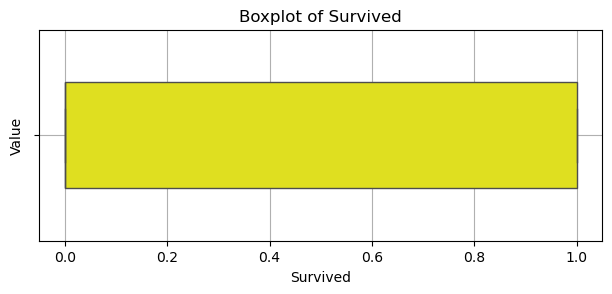

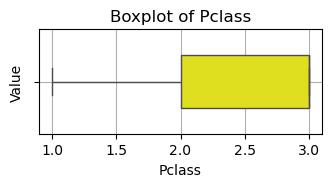

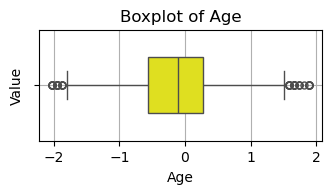

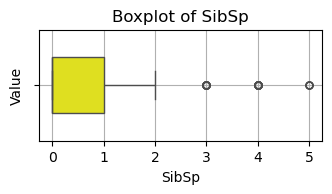

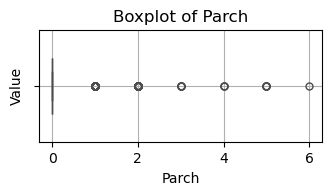

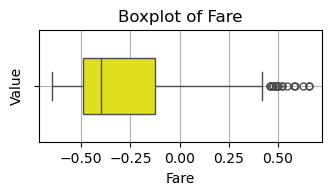

In [7]:
#Boxplots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=analysis[feature],color='yellow', orient='h', width=0.5, fliersize=5)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.grid()
    plt.tight_layout()
    plt.show()

STEP 3 - Using pairplot/correlation matrix to show feature relationships

Pairplot for numerical features

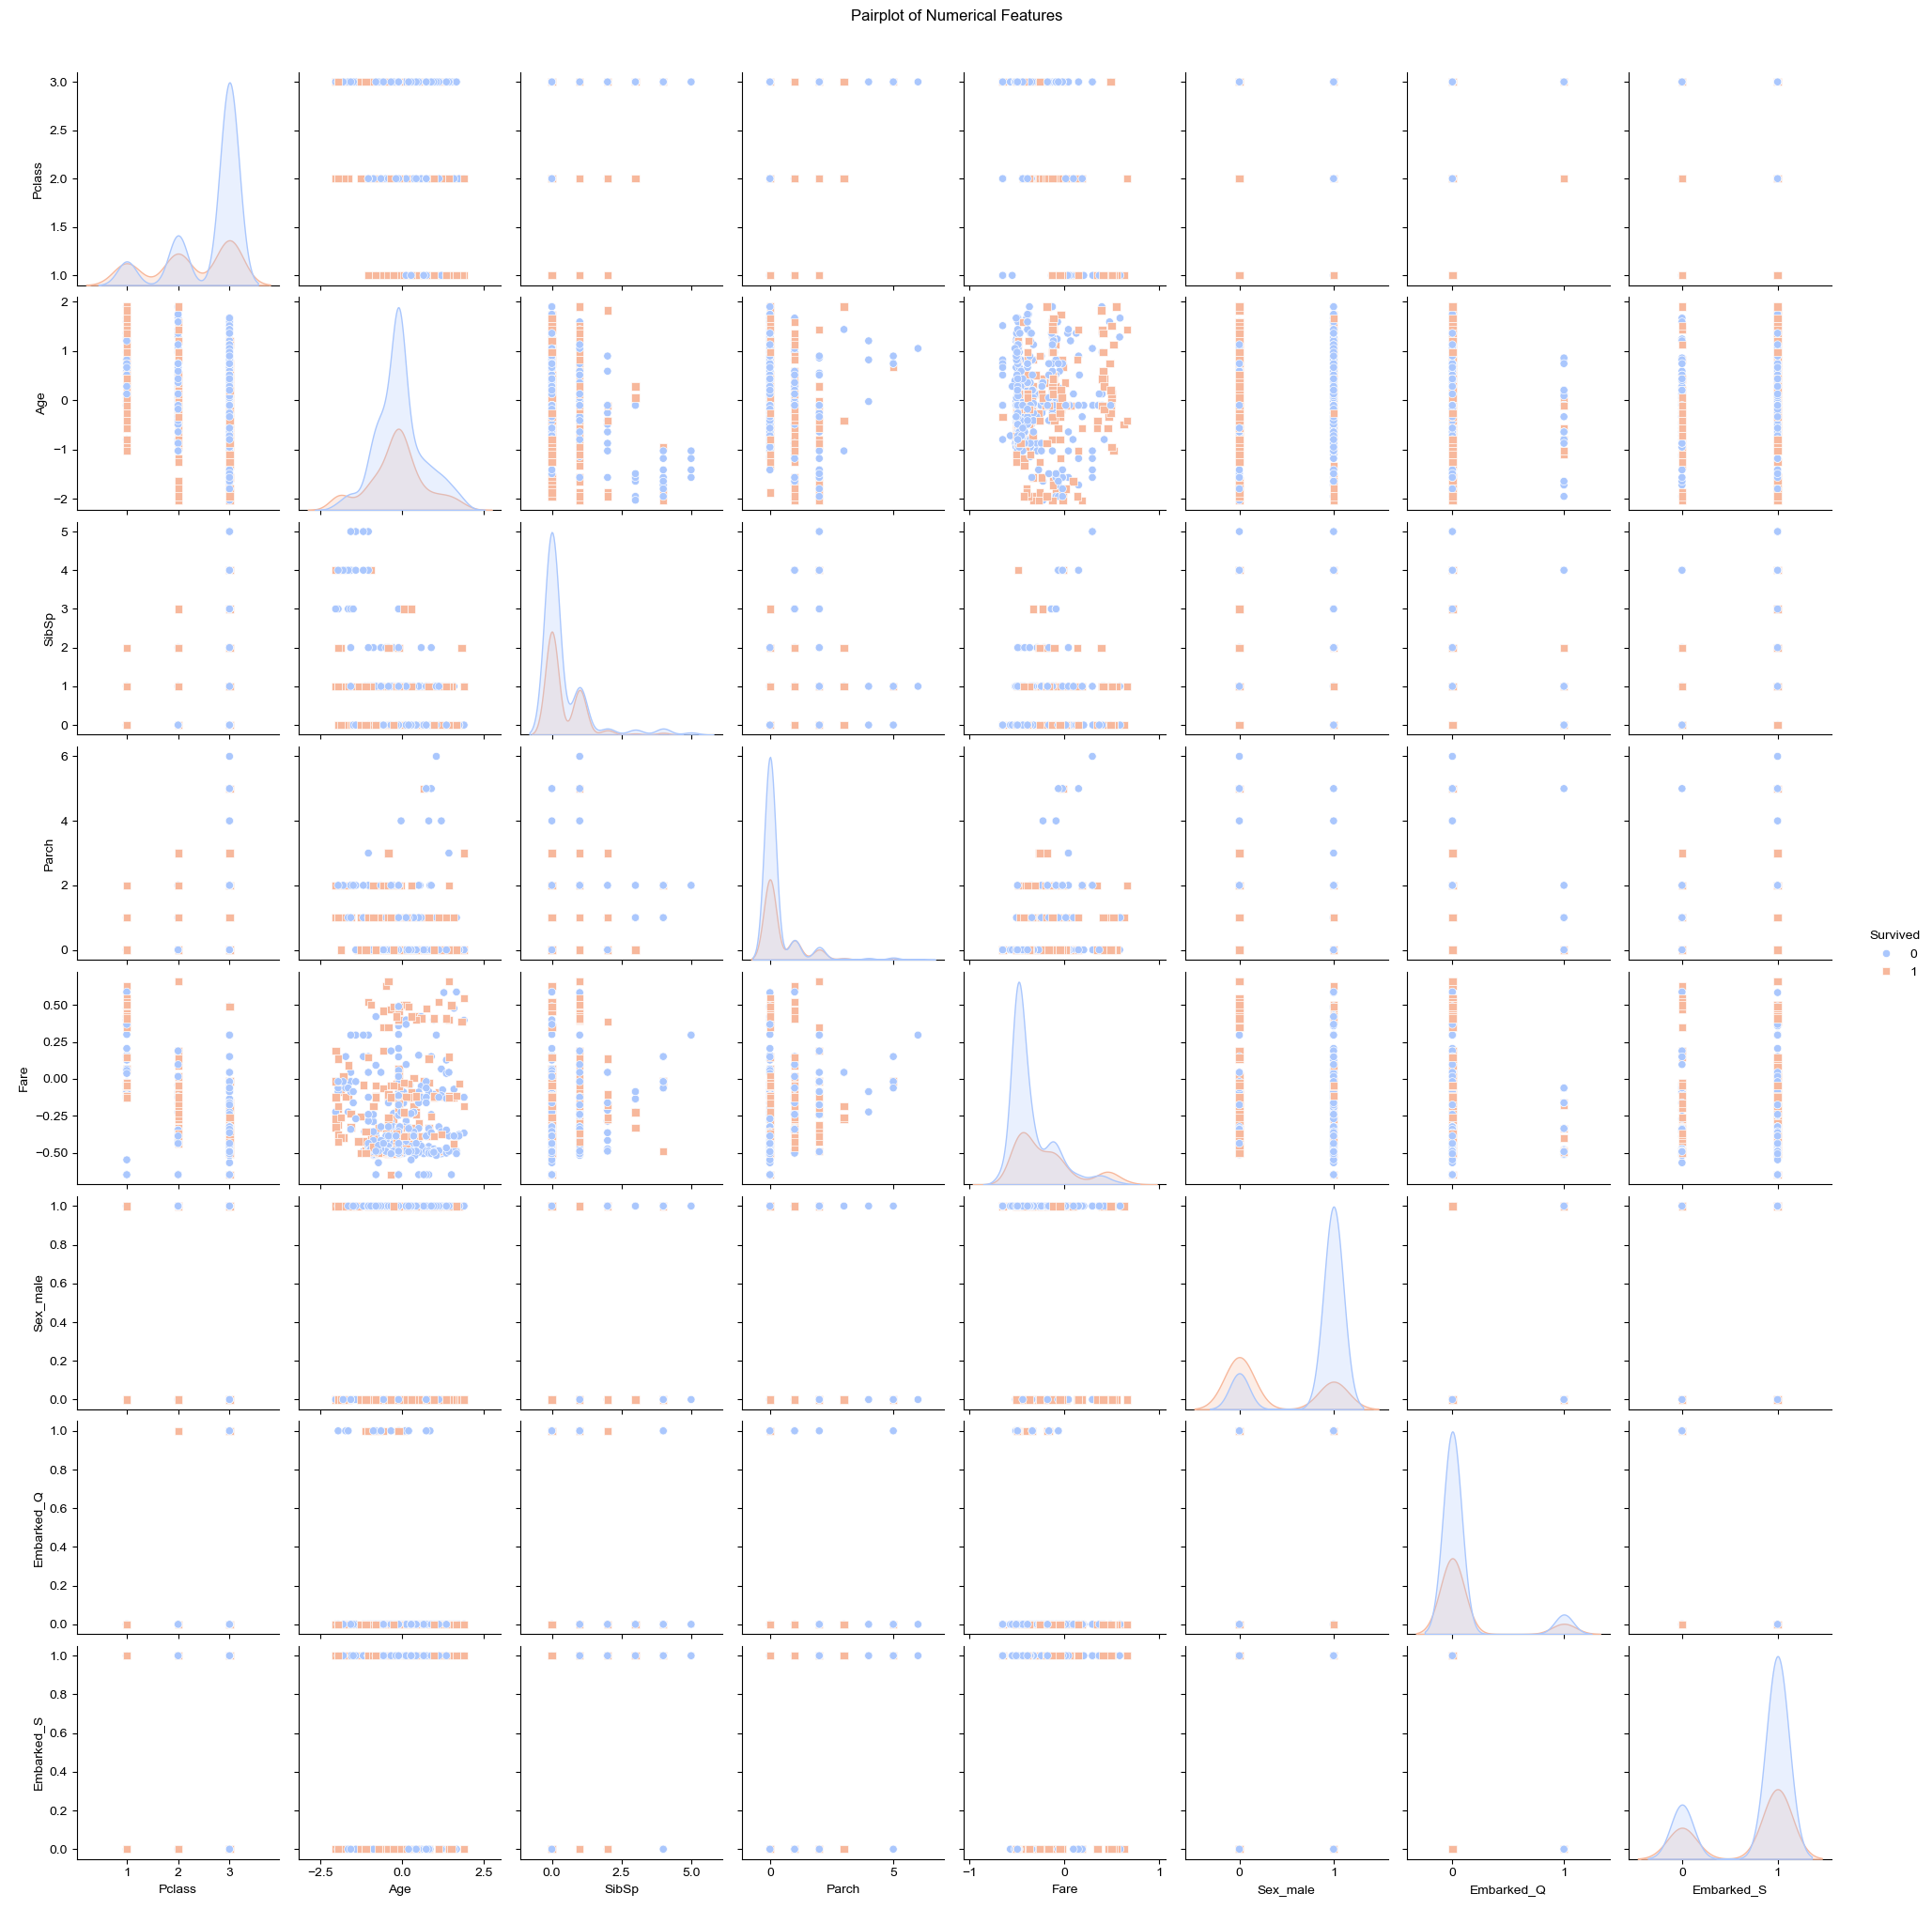

In [8]:
sns.pairplot(analysis,hue='Survived', palette='coolwarm', diag_kind='kde', markers=["o", "s"], height=2.5)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
sns.set(font_scale=1.2,style='whitegrid')
plt.show()

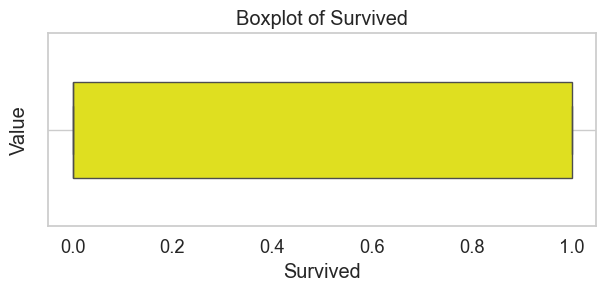

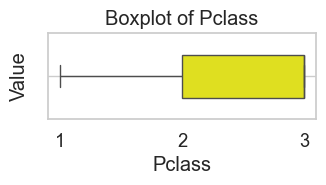

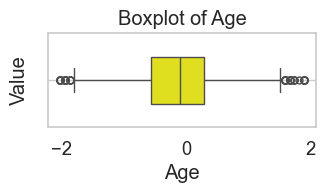

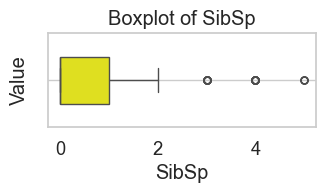

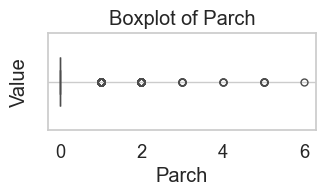

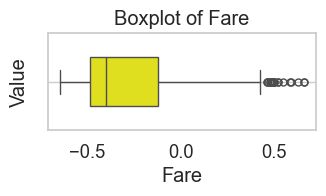

In [ ]:
#correlation matrix
correlation = analysis.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', y=1.02)
plt.show()